In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
import yfinance as yf

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [7]:
BTC_data = yf.download('BTC-USD', start='2023-04-21', end='2023-04-21',  interval = '1m')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC-USD: IndexError('index 0 is out of bounds for axis 0 with size 0')


In [8]:
btc_data = yf.download('BTC-USD', start='2023-04-05', end='2023-04-06', interval='1m')

[*********************100%***********************]  1 of 1 completed


In [10]:
btc_data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-05 00:00:00+00:00,28169.726562,28169.726562,28169.726562,28169.726562,28169.726562,0
2023-04-05 00:01:00+00:00,28176.996094,28176.996094,28176.996094,28176.996094,28176.996094,0
2023-04-05 00:02:00+00:00,28162.789062,28162.789062,28162.789062,28162.789062,28162.789062,0
2023-04-05 00:03:00+00:00,28167.488281,28167.488281,28167.488281,28167.488281,28167.488281,0
2023-04-05 00:04:00+00:00,28166.416016,28166.416016,28166.416016,28166.416016,28166.416016,0
...,...,...,...,...,...,...
2023-04-05 23:54:00+00:00,28180.347656,28180.347656,28180.347656,28180.347656,28180.347656,0
2023-04-05 23:55:00+00:00,28173.736328,28173.736328,28173.736328,28173.736328,28173.736328,8029184
2023-04-05 23:56:00+00:00,28169.289062,28169.289062,28169.289062,28169.289062,28169.289062,0


In [11]:
eth_data = yf.download('ETH-USD', start='2023-04-05', end='2023-04-06',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [12]:
eth_data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-05 00:00:00+00:00,1870.965088,1870.965088,1870.965088,1870.965088,1870.965088,0
2023-04-05 00:01:00+00:00,1871.278564,1871.278564,1871.278564,1871.278564,1871.278564,0
2023-04-05 00:02:00+00:00,1870.190674,1870.190674,1870.190674,1870.190674,1870.190674,0
2023-04-05 00:03:00+00:00,1870.069336,1870.069336,1870.069336,1870.069336,1870.069336,0
2023-04-05 00:04:00+00:00,1869.870850,1869.870850,1869.870850,1869.870850,1869.870850,0
...,...,...,...,...,...,...
2023-04-05 23:54:00+00:00,1910.304932,1910.304932,1910.304932,1910.304932,1910.304932,0
2023-04-05 23:55:00+00:00,1909.565674,1909.565674,1909.565674,1909.565674,1909.565674,1157120
2023-04-05 23:56:00+00:00,1909.398193,1909.398193,1909.398193,1909.398193,1909.398193,0


In [14]:
S1_0 = btc_data['Open'][0]
S2_0 = eth_data['Open'][0]

In [15]:
S1_0

28169.7265625

In [16]:
S2_0

1870.965087890625

In [18]:
lr1 = np.log(btc_data['Adj Close'] / btc_data['Adj Close'].shift(1))
lr2 = np.log(eth_data['Adj Close'] / eth_data['Adj Close'].shift(1))
mu_1 = lr1.mean() * 390
mu_2 = lr2.mean() * 390
sigma_1 = lr1.std() * np.sqrt(390)
sigma_2 = lr2.std() * np.sqrt(390)
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 0.5
delta = 0.8
T = 1
M = len(btc_data)

In [19]:
result = linregress(np.log(btc_data['Adj Close']), np.log(eth_data['Adj Close']))
beta = result.slope

In [20]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [21]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = btc_data['Adj Close'][t-1]
    S2[t] = eth_data['Adj Close'][t-1]

Text(0.5, 1.0, 'Stock Price')

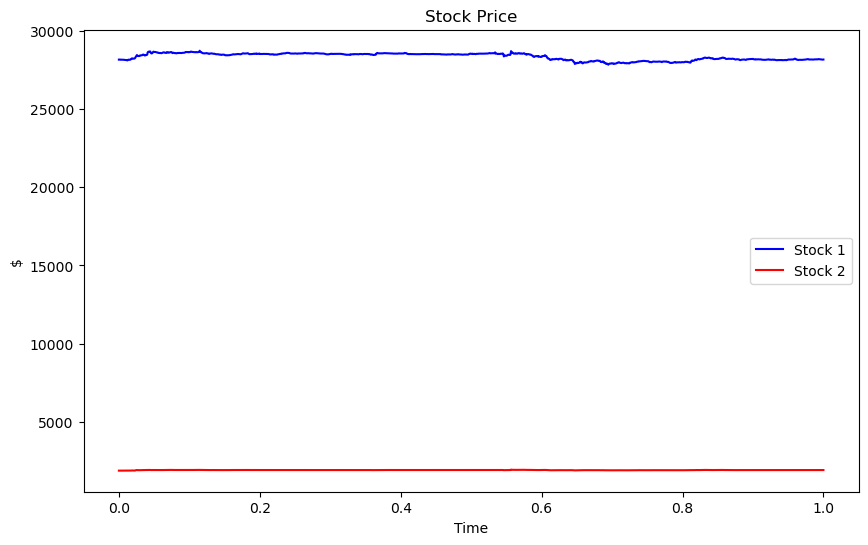

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

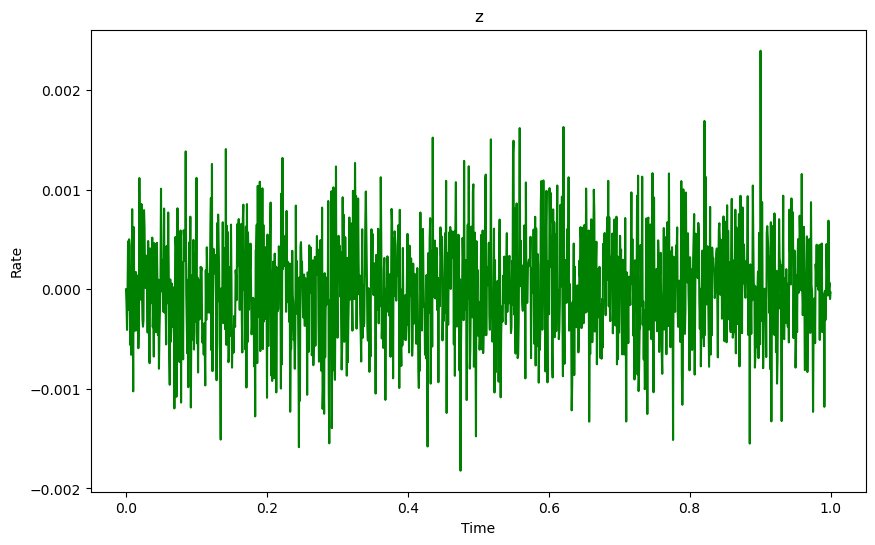

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [24]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

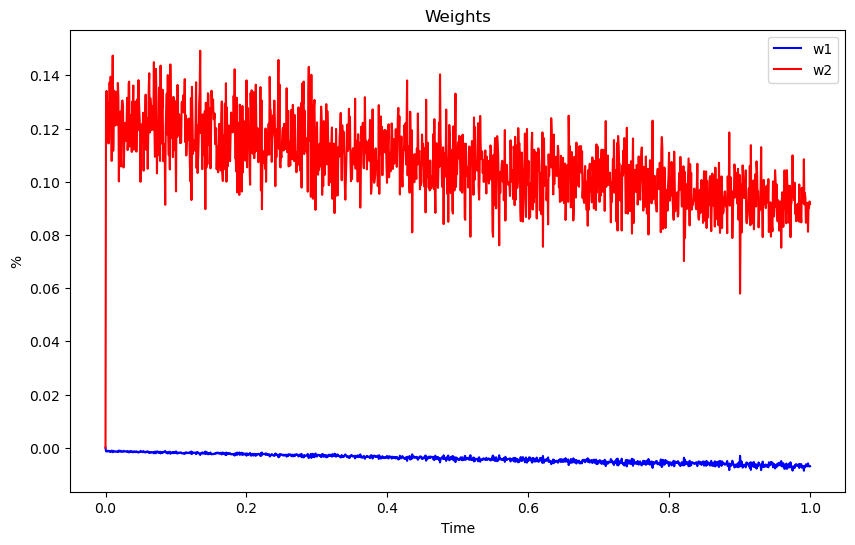

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

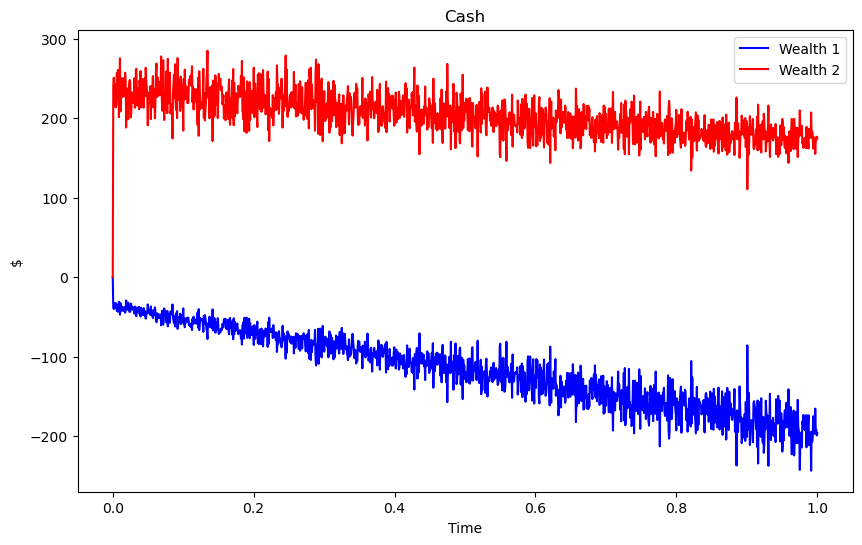

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [27]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

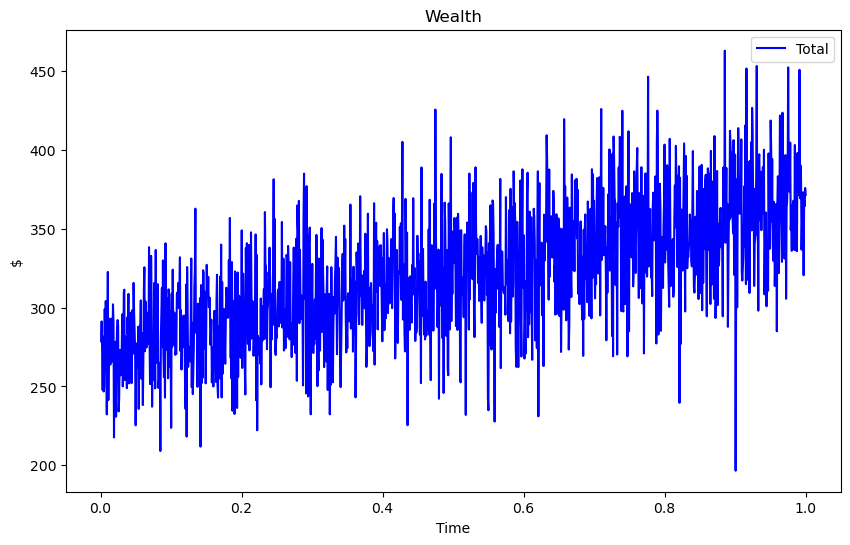

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [29]:
Wealth[1]

array([278.6316053])

In [30]:
Wealth[-1]

array([371.50086268])

In [31]:
(Wealth[-1] - Wealth[1])/Wealth[1]

array([0.33330482])